# Importing dataset

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import numpy as np

In [37]:
df = pd.read_csv("/content/drive/MyDrive/coords.csv")

df.head()

,class_name,pose_present,pose_x_0,pose_y_0,pose_z_0,pose_v_0,pose_x_1,pose_y_1,pose_z_1,pose_v_1,...,left_z_17,left_x_18,left_y_18,left_z_18,left_x_19,left_y_19,left_z_19,left_x_20,left_y_20,left_z_20
0,crossing_arms,1,0.572597,0.224525,-0.713397,0.999464,0.597508,0.180132,-0.681170,0.997778,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,crossing_arms,1,0.569808,0.224702,-0.880674,0.999447,0.595166,0.179992,-0.844131,0.997756,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,crossing_arms,1,0.568135,0.224807,-0.931058,0.999437,0.593796,0.179968,-0.894826,0.997747,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,crossing_arms,1,0.567873,0.224636,-0.924162,0.999457,0.593332,0.179589,-0.887469,0.997836,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,crossing_arms,1,0.567637,0.224155,-0.955115,0.999475,0.593094,0.178909,-0.916476,0.997922,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Pre-processing

In [38]:
X = df.drop('class_name', axis=1) # features
y = df['class_name'] # target value

In [39]:
X.dtypes

,0
pose_present,int64
pose_x_0,float64
pose_y_0,float64
pose_z_0,float64
pose_v_0,float64
...,...
left_y_19,float64
left_z_19,float64
left_x_20,float64
left_y_20,float64


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

# y_test

In [41]:
# Encode class labels as integers

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # Fit and transform training labels
y_test_encoded = label_encoder.transform(y_test)  # Transform test labels using same mapping

In [42]:
# Compute class weights (Inverse Frequency Method)
class_counts = np.bincount(y_train_encoded)
total_samples = len(y_train_encoded)
class_weights = {i: total_samples / count for i, count in enumerate(class_counts)}

# Convert dictionary to list format for XGBoost
scale_pos_weight_values = [class_weights[i] for i in range(len(class_counts))]

# Model creation and training

In [43]:
# Create and train an XGBoost classifier with class weighting

xgb_classifier = xgb.XGBClassifier(
    objective='multi:softmax',  # Multi-class classification
    num_class=len(label_encoder.classes_),  # Number of unique classes
    eval_metric='mlogloss',  # Log loss for multi-class classification
    use_label_encoder=False,  # Suppress label encoding warning
    random_state=1234,
    scale_pos_weight=scale_pos_weight_values,  # Apply class weights
    tree_method='gpu_hist',  # Use GPU-accelerated training
    device='cuda'  # Explicitly set device to GPU
)

In [44]:
# Train the model

xgb_classifier.fit(
    X_train, y_train_encoded,
    eval_set=[(X_train, y_train_encoded), (X_test, y_test_encoded)],  # Tracking training & validation loss
    #eval_metric='mlogloss',  # Log loss for multi-class classification
    verbose=True  # Show progress
    )

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:53:27] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:53:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation_0-mlogloss:1.08571	validation_1-mlogloss:1.20438
[1]	validation_0-mlogloss:0.80001	validation_1-mlogloss:0.93534
[2]	validation_0-mlogloss:0.62337	validation_1-mlogloss:0.75840
[3]	validation_0-mlogloss:0.48952	validation_1-mlogloss:0.62177
[4]	validation_0-mlogloss:0.38913	validation_1-mlogloss:0.51660
[5]	validation_0-mlogloss:0.31019	validation_1-mlogloss:0.43056
[6]	validation_0-mlogloss:0.24676	validation_1-mlogloss:0.36060
[7]	validation_0-mlogloss:0.19910	validation_1-mlogloss:0.30748
[8]	validation_0-mlogloss:0.15954	validation_1-mlogloss:0.26135
[9]	validation_0-mlogloss:0.12981	validation_1-mlogloss:0.22569
[10]	validation_0-mlogloss:0.10472	validation_1-mlogloss:0.19431
[11]	validation_0-mlogloss:0.08563	validation_1-mlogloss:0.16896
[12]	validation_0-mlogloss:0.07025	validation_1-mlogloss:0.14849
[13]	validation_0-mlogloss:0.05760	validation_1-mlogloss:0.13099
[14]	validation_0-mlogloss:0.04760	validation_1-mlogloss:0.11605
[15]	validation_0-mlogloss:0.03956	

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=26, num_parallel_tree=None, ...)

# Accuracy and analysis of model performance

In [45]:
# Make predictions
y_pred_encoded = xgb_classifier.predict(X_test)

# Convert predictions back to original labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Print results
print(f"XGBoost Classifier Accuracy: {accuracy:.4f}\n")
print("Classification Report:\n", class_report)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:55:56] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


XGBoost Classifier Accuracy: 0.9957

Classification Report:
                    precision    recall  f1-score   support

   covering_mouth       1.00      1.00      1.00       431
    crossing_arms       0.99      1.00      1.00       416
    folding_palms       1.00      1.00      1.00       322
        gesturing       1.00      1.00      1.00       837
     hair_tucking       1.00      0.98      0.99       342
     hand_on_neck       1.00      1.00      1.00       440
    head_in_hands       1.00      1.00      1.00       251
             idle       1.00      1.00      1.00       347
     looking_down       1.00      1.00      1.00       372
      nail_biting       1.00      1.00      1.00       368
          nodding       0.99      0.98      0.99       316
  pointing_finger       1.00      0.99      1.00       348
 rubbing_forehead       0.99      0.99      0.99       377
  scratching_head       0.99      1.00      0.99       411
     shaking_fist       0.99      1.00      1.00     

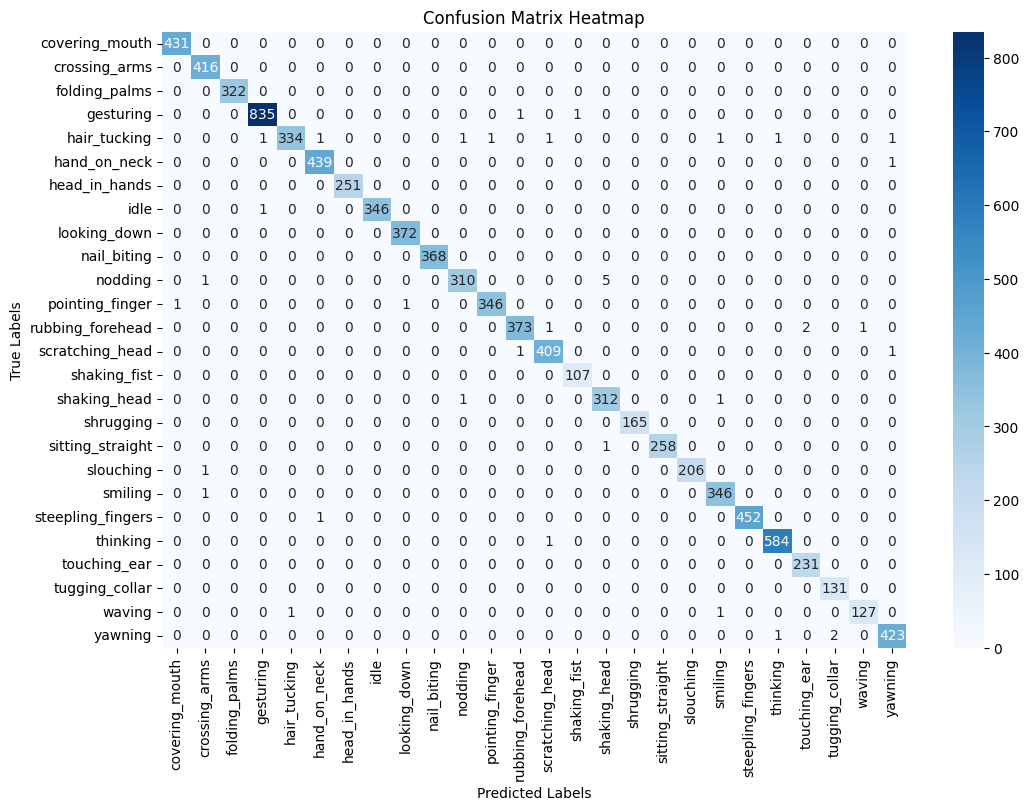

In [46]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

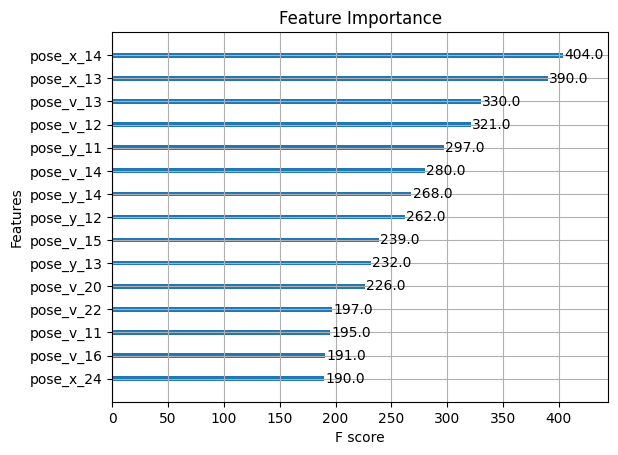

In [47]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Plot feature importance
xgb.plot_importance(xgb_classifier, max_num_features=15)  # Show top 15 features
plt.title("Feature Importance")
plt.show()


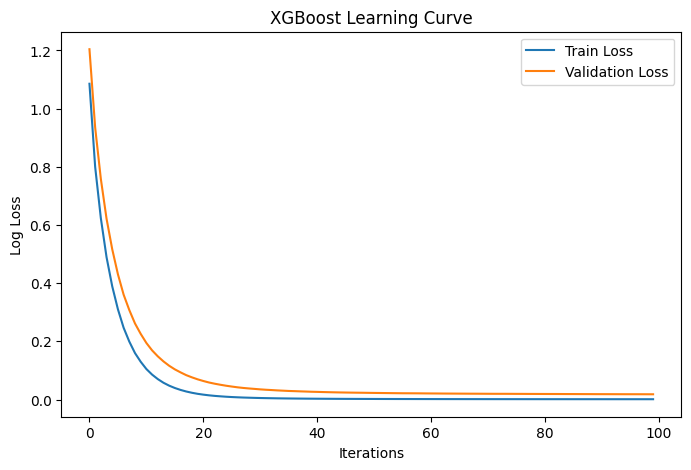

In [48]:
results = xgb_classifier.evals_result()

# Plot training and validation loss
plt.figure(figsize=(8,5))
plt.plot(results['validation_0']['mlogloss'], label='Train Loss')
plt.plot(results['validation_1']['mlogloss'], label='Validation Loss')
plt.xlabel("Iterations")
plt.ylabel("Log Loss")
plt.title("XGBoost Learning Curve")
plt.legend()
plt.show()


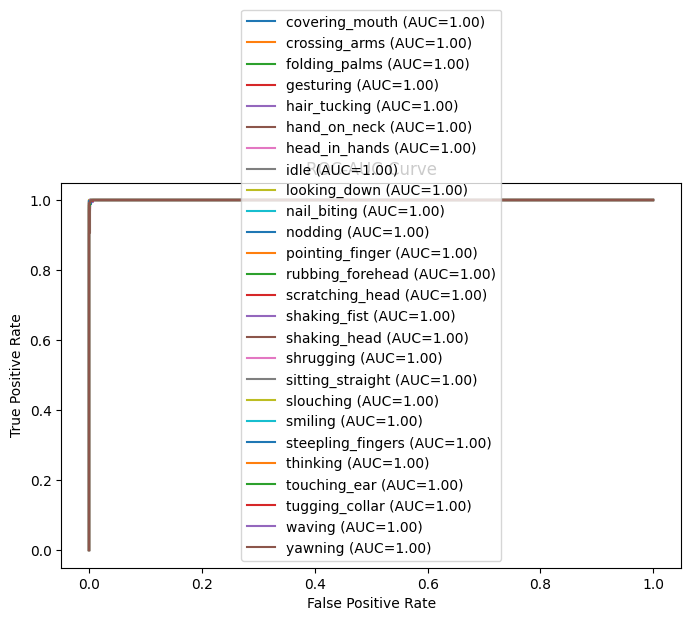

In [49]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

y_prob = xgb_classifier.predict_proba(X_test)  # Get probability scores for each class

# Binarize class labels for multi-class ROC
y_test_binarized = label_binarize(y_test_encoded, classes=np.arange(len(label_encoder.classes_)))

plt.figure(figsize=(8, 5))

# Plot ROC curve for each class
for i, class_name in enumerate(label_encoder.classes_):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_name} (AUC={auc_score:.2f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()


# Saving the model

In [50]:
xgb_classifier.save_model("body_lang_model.json")  # Save as JSON format

In [57]:
# save label encoder as a Pickle file

import pickle

with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

In [58]:
# Download the files to local system

from google.colab import files
files.download("body_lang_model.json")
files.download("label_encoder.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>